In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
%pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 44.3 MB/s eta 0:00:00


In [16]:
from dash import Dash, dcc, html, Input, Output,callback

app = Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(['NYC', 'MTL', 'SF'], 'NYC', id='demo-dropdown'),
    html.Div(id='dd-output-container')
])


@callback(
    Output('dd-output-container', 'children'),
    Input('demo-dropdown', 'value')
)
def update_output(value):
    return f'You have selected {value}'


if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [17]:
%pip install js

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.5 MB/s eta 0:00:00
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2883 sha256=aca3c48193727e1d48dcd2b9751a7a71bfe5071fd2da3b3e4216b661c2077308
  Stored in directory: /root/.cache/pip/wheels/77/dc/68/d580eaea0ef6137289a09dabe661f5df14951f5c29c08d443d
Successfully built js


In [21]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


In [24]:
# adding month and year
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


In [26]:
df.info() # review columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
 10  Year                                 26406 non-null  int32  
 11  Month                       

Text(0.5, 1.0, 'Estimated Fire Area over Time')

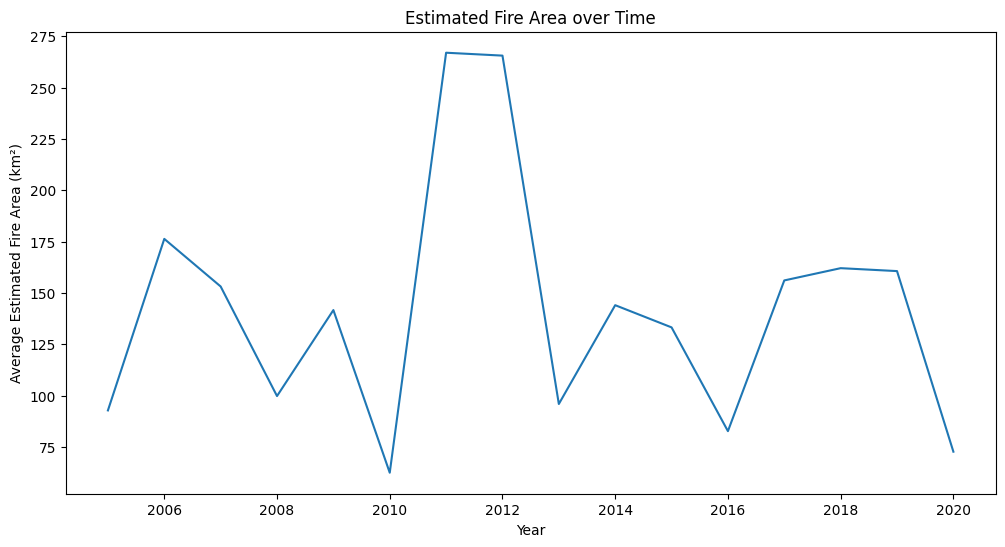

In [37]:
plt.figure(figsize=(12,6))
df.groupby('Year')['Estimated_fire_area'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

Text(0.5, 1.0, 'Estimated Fire Area over Time')

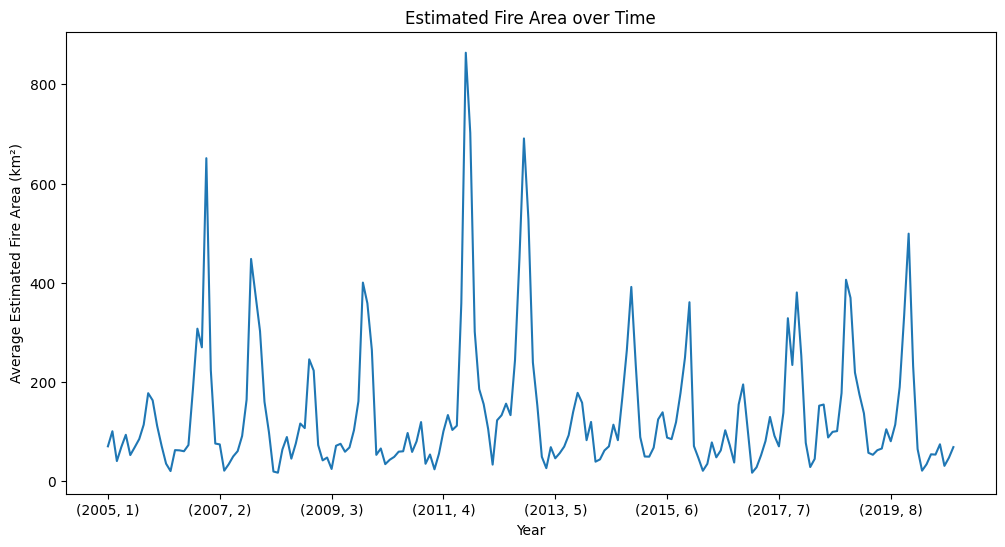

In [39]:
plt.figure(figsize=(12,6))
df.groupby(['Year','Month'])['Estimated_fire_area'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

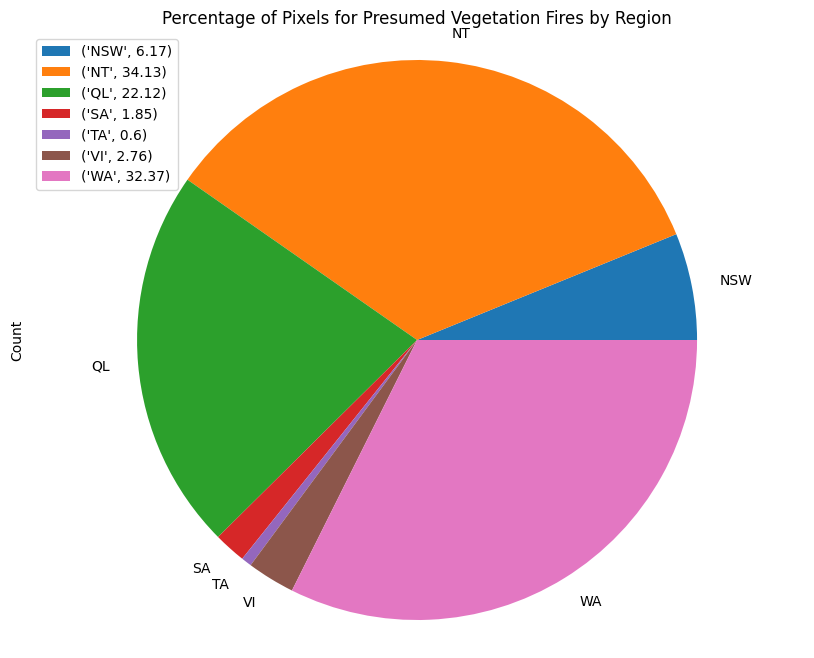

In [40]:
plt.figure(figsize=(10, 8))
region_counts = df.groupby('Region')['Count'].sum()
region_counts.plot(kind='pie')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

<Axes: xlabel='Mean_estimated_fire_brightness', ylabel='Count'>

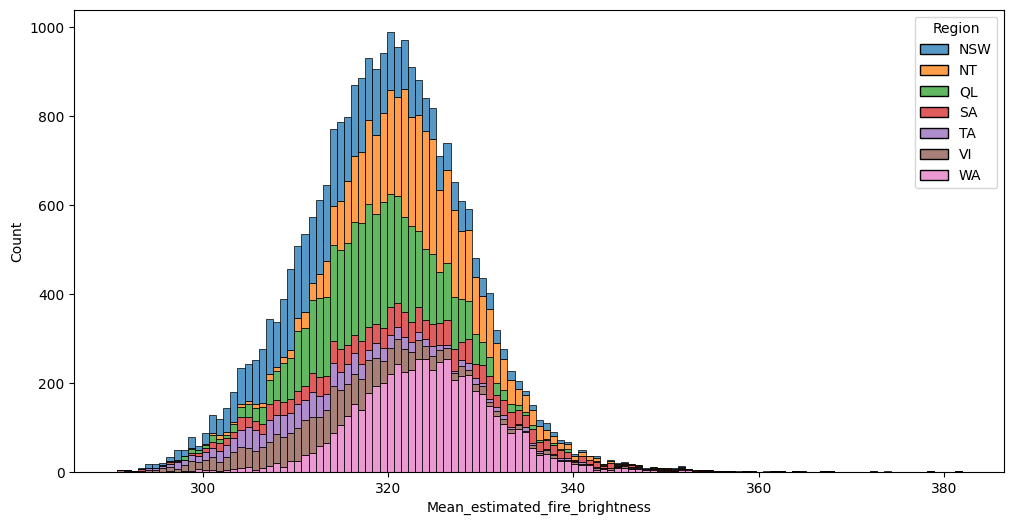

In [49]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region',multiple='stack',)

In [50]:
#%pip install --upgrade pandas seaborn


Text(0.5, 1.0, 'Mean Estimated Fire Radiative Power vs. Mean Confidence')

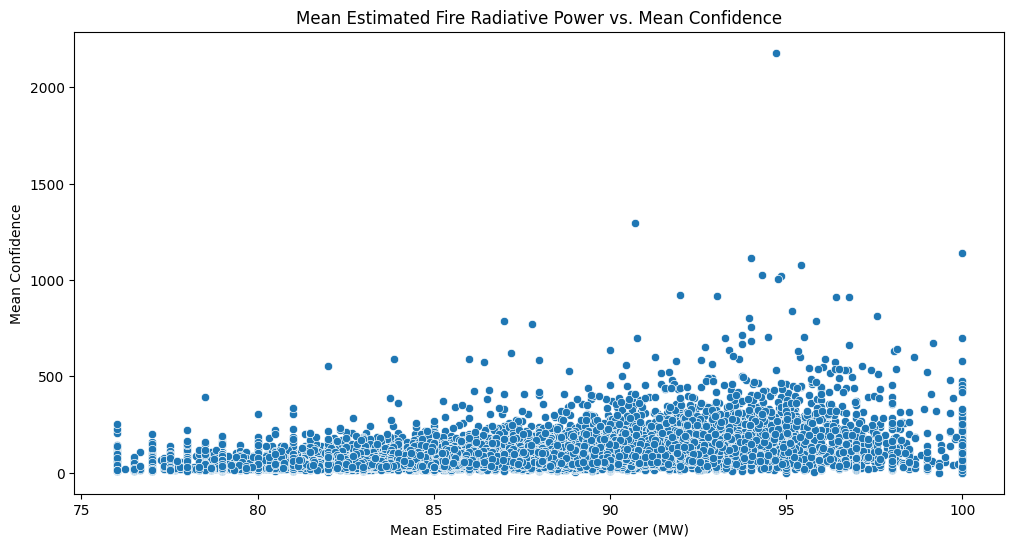

In [52]:
plt.figure(figsize=(12, 6))
# Using sns.scatterplot to create the scatter plot
# Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')